<a href="https://colab.research.google.com/github/parmimaher/CNN_cifar10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample (x,y,index):
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
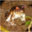

In [ ]:
x_train[0]

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
ann = models.Sequential([layers.Flatten(input_shape = (32,32,3)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(1000, activation='relu'),
                        layers.Dense(10, activation='sigmoid')])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.8120 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.6266 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.5437 - accuracy: 0.4535
Epoch 4/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4830 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.4307 - accuracy: 0.4960


In [ ]:
cnn = models.Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(10, activation='softmax')])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5340 - accuracy: 0.4441
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2360 - accuracy: 0.5657
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1294 - accuracy: 0.6043
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0590 - accuracy: 0.6299
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0043 - accuracy: 0.6507
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9643 - accuracy: 0.6630
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9290 - accuracy: 0.6785
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8959 - accuracy: 0.6914
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8666 - accuracy: 0.6997
Epoch 10/10
1563/1563 [==============================] - 35s 22m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.0499 - accuracy: 0.6463


[1.0498559474945068, 0.6463000178337097]

In [ ]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.4897 - accuracy: 0.4760


[1.4896973371505737, 0.47600001096725464]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[3.00418749e-03, 2.37632310e-04, 9.94363567e-04, 8.53334188e-01,
        4.72381187e-04, 7.13012367e-02, 6.48163781e-02, 1.43511943e-03,
        3.82349757e-03, 5.80921595e-04],
       [1.89169720e-02, 9.80002061e-02, 2.42765600e-05, 6.88387081e-06,
        3.32604236e-06, 2.78516018e-06, 4.01468287e-06, 2.45293649e-07,
        8.77219141e-01, 5.82216494e-03],
       [6.46663785e-01, 3.45609710e-02, 2.01079026e-02, 6.47677202e-03,
        2.85730558e-03, 9.68835840e-04, 1.46343082e-04, 1.06030647e-02,
        2.42388144e-01, 3.52269001e-02],
       [3.73752326e-01, 5.95184229e-02, 9.15711597e-02, 8.91119149e-03,
        1.69907138e-02, 1.63806404e-03, 6.99046254e-03, 1.96646806e-03,
        4.18392062e-01, 2.02692710e-02],
       [1.27840540e-05, 8.34072358e-04, 2.97449739e-03, 1.00702442e-01,
        4.20120746e-01, 3.55588980e-02, 4.39481080e-01, 1.00202575e-04,
        7.12422843e-05, 1.43989018e-04]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 8, 6]

In [ ]:
y_test[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

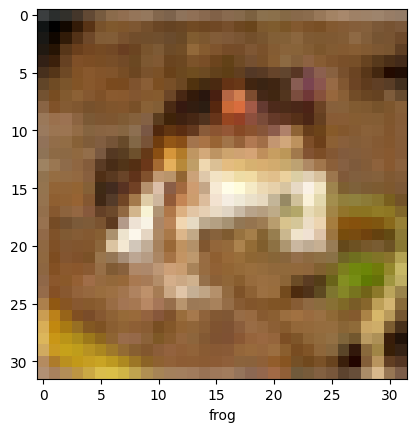

In [ ]:
plot_sample(x_test,y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'